In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from data_clean import *

In [76]:
player_stats = pd.read_csv("player_combined.csv", sep = '\t')
game_stats = pd.read_csv("./game_combined.csv", sep = '\t')


Function to split stats and to return the percentage in a list

Cleaning up the game stats to only be the games that Baird played during her career

In [77]:
dates_player = player_stats["Date"].to_numpy()
dates_game = game_stats["Date"].to_numpy()
correct_dates = []

for i in dates_game:
    correct_dates.append(i in dates_player)
correct_dates

game_stats["correct dates"] = correct_dates

In [78]:
game_updated = game_stats[game_stats["correct dates"]== True]
game_updated = game_updated[["Date", "Score", "W/L"]]

Sorting and Combining the Data from game_updated & player_stats
#####


In [79]:
full_stats = game_updated.merge(player_stats)

In [80]:
full_stats.head(0) #grab names

,Date,Score,W/L,Opponent,PTS,MIN,FGM-FGA,3PM-3PA,FTM-FTA,REB,AST,BLK,STL,TO,PF,Year


In [81]:
full_stats["Date"] = str_to_date(full_stats["Date"].to_numpy())


In [82]:
full_stats["3%"] = get_percent(full_stats["3PM-3PA"].to_numpy(),)
full_stats["fg%"] = get_percent(full_stats["FGM-FGA"].to_numpy(),)
full_stats["ft%"] = get_percent(full_stats["FTM-FTA"].to_numpy(),)
full_stats.sort_values(by=["Date"])
full_stats;

Basic Graphing

In [83]:
full_stats.head(0)
senior = full_stats[full_stats["Year"] == "Senior"]
junior = full_stats[full_stats["Year"] == "Junior"]
freshman = full_stats[full_stats["Year"] == "Freshman"]
sophmore = full_stats[full_stats["Year"] == "Sophmore"]

Disregard below

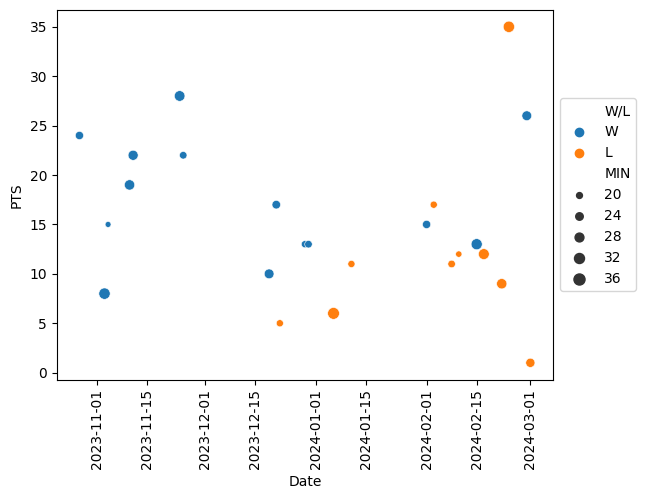

In [84]:
sns.scatterplot(data=senior, x = "Date", y = "PTS", size = "MIN", hue = "W/L")
#sns.lineplot(data=senior[senior["W/L"] == 'L'], x = "Date", y = "PTS", color = "r")
#sns.lineplot(data=senior[senior["W/L"] == 'W'], x = "Date", y = "PTS", color = 'g')

plt.xticks(rotation = 90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [85]:
full_stats["Score"] #TODO write a funciton that will split a string based on the sep and make 2 new tmp columns(not on the csv)

def seperate(table, col: str, data_type, divider = '-', name1 = "New_col1", name2 = "New_col2", delete_original = False ):
    """takes a table and an col name then splits them and adds them back to the orginal table

    Args:
        table (_type_): _description_
        col (str): _description_
        divider (str, optional): _description_. Defaults to '-'.
        name1 (str, optional): _description_. Defaults to "New_col1".
        name2 (str, optional): _description_. Defaults to "New_col2".
    """
    column = table[col].to_numpy()
    data1 = []
    data2 = []
    
    for item in column:
        item1, item2 = item.split(sep = divider)
        data1.append(data_type(item1))
        data2.append(data_type(item2))
    table[name1] = data1
    table[name2] = data2
    
    if delete_original:
        table.drop(columns =[col])
    
    return 
    
    

In [86]:

seperate(full_stats, "Score",int,  name1 = "Home Score", name2 = "Opponent Score", delete_original=True)


In [87]:
senior = full_stats[full_stats["Year"] == "Senior"]
junior = full_stats[full_stats["Year"] == "Junior"]
freshman = full_stats[full_stats["Year"] == "Freshman"]
sophmore = full_stats[full_stats["Year"] == "Sophmore"]

In [88]:
percent(full_stats, "PTS", "Home Score", "PersonalPointPercentage")

Text(0.5, 0, 'Date')

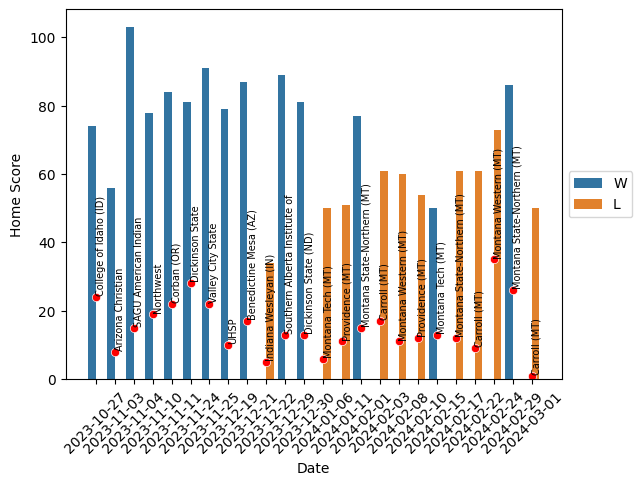

In [89]:
table = sns.barplot(data = senior, x = senior.index, y = "Home Score", hue = "W/L");
table.set_xticklabels(senior.Date)
sns.scatterplot(data = senior, x = senior.index, y = "PTS", color = 'r')

label(table, senior.index, senior.PTS, senior.Opponent, rotate=90, font_size=7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 45);
table.set_xlabel("Date")


In [90]:
full_stats = full_stats.sort_values(by = "Date", ascending= True)
full_stats =full_stats.reset_index()
full_stats.head(0)



,index,Date,Score,W/L,Opponent,PTS,MIN,FGM-FGA,3PM-3PA,FTM-FTA,...,STL,TO,PF,Year,3%,fg%,ft%,Home Score,Opponent Score,PersonalPointPercentage


/var/folders/nd/s5gxl9pj60sgyn97zbdrmn6c0000gn/T/ipykernel_35290/4097483596.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  full.set_xticklabels(full_stats.Date);


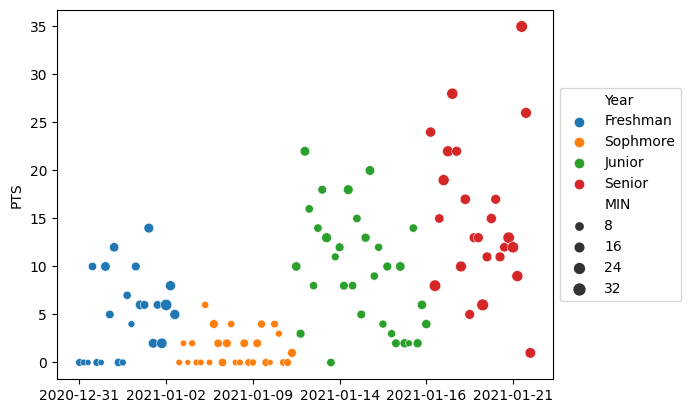

In [91]:
full = sns.scatterplot(data = full_stats, x = full_stats.index, y = "PTS", hue = "Year", size = "MIN")
full.set_xticklabels(full_stats.Date);
full.legend(loc='center left', bbox_to_anchor=(1, 0.5))
